In [1]:
import zipfile
import tensorflow as tf
import os
# import  imageio
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
# from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# from pyESN.pyESN import ESN

In [3]:

mat3 = scipy.io.loadmat('case3_extended_8000.mat')




ns3_extended = mat3['ns']
nn_classic = mat3['n_a']
g2_case3_extended = abs(mat3['g2_a'])
Delta_extended = mat3['Delta1_vector'][0]


In [4]:
n_case3_extended_Delta = []
g2_re_extended = []
n_classic = []

for i in range(8000):
    n_case3_extended_Delta.append(list(ns3_extended[0][i][0]))
    g2_re_extended.append({g2_case3_extended[i][0]:Delta_extended[i]})
    n_classic.append(nn_classic[i][0])

n_case3_extended_Delta = np.array(n_case3_extended_Delta)
X_train_c3_ex, X_test_c3_ex, Y_train_c3_ex, Y_test_c3_ex = train_test_split(n_case3_extended_Delta,g2_re_extended, test_size=0.025)
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(n_classic, g2_re_extended, test_size=0.025)
X_train_c = np.reshape(X_train_c,[len(X_train_c),1])
X_test_c = np.reshape(X_test_c,[len(X_test_c),1])

In [5]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []


for ele in Y_train_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_test_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))


Y_train_g2_c = []
Y_train_r_c = []

Y_test_g2_c = []
Y_test_r_c = []

for ele in Y_train_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2_c.append(key)
  Y_train_r_c.append(value[0])
Y_train_g2_c = np.reshape(Y_train_g2_c,(len(Y_train_g2_c),1))

for ele in Y_test_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2_c.append(key[0])
  Y_test_r_c.append(value[0])
Y_test_g2_c = np.reshape(Y_test_g2_c,(len(Y_test_g2_c),1))

In [6]:
# regressor = RandomForestRegressor(n_estimators=100)
regressor = ExtraTreesRegressor()
regressor.fit(X_train_c3_ex, Y_train_g2)
Y_predict_RFR = regressor.predict(X_test_c3_ex)


regressor_classic = RandomForestRegressor(n_estimators=100)
regressor_classic.fit(X_train_c, Y_train_g2_c)
Y_predict_RFR_classic = regressor_classic.predict(X_test_c)


C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [12]:
# initializer = initializers.RandomUniform(minval=0.0, maxval=1.0)
# layer = Dense(3, kernel_initializer=initializer)

model = tf.keras.models.Sequential([
  # tf.keras.layers.Dense(3, input_shape=(10000, )),
  # tf.keras.layers.Dense(64, activation='relu'),
  # tf.keras.layers.Dense(2, input_shape=(8, ))
  tf.keras.layers.Dense(1, input_shape=(len(X_train_c3_ex[0]), ))
  # tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

optim = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optim,
#               loss='mse',
#               metrics=['mae'])
model.compile(optimizer=optim,
              loss='mse'
              )



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 41        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train_c3_ex, Y_train_g2, batch_size=20, epochs=500)

Epoch 1/500
390/390 [==============================] - 0s 515us/step - loss: 1.1820
Epoch 2/500
390/390 [==============================] - 0s 478us/step - loss: 0.8544
Epoch 3/500
390/390 [==============================] - 0s 485us/step - loss: 0.7045
Epoch 4/500
390/390 [==============================] - 0s 512us/step - loss: 0.6148
Epoch 5/500
390/390 [==============================] - 0s 478us/step - loss: 0.5692
Epoch 6/500
390/390 [==============================] - 0s 431us/step - loss: 0.5492
Epoch 7/500
390/390 [==============================] - 0s 430us/step - loss: 0.5420
Epoch 8/500
390/390 [==============================] - 0s 423us/step - loss: 0.5395
Epoch 9/500
390/390 [==============================] - 0s 426us/step - loss: 0.5390
Epoch 10/500
390/390 [==============================] - 0s 444us/step - loss: 0.5388
Epoch 11/500
390/390 [==============================] - 0s 460us/step - loss: 0.5386
Epoch 12/500
390/390 [==============================] - 0s 436us/step - lo

390/390 [==============================] - 0s 420us/step - loss: 0.5311
Epoch 98/500
390/390 [==============================] - 0s 418us/step - loss: 0.5310
Epoch 99/500
390/390 [==============================] - 0s 419us/step - loss: 0.5311
Epoch 100/500
390/390 [==============================] - 0s 484us/step - loss: 0.5309
Epoch 101/500
390/390 [==============================] - 0s 440us/step - loss: 0.5310
Epoch 102/500
390/390 [==============================] - 0s 425us/step - loss: 0.5307
Epoch 103/500
390/390 [==============================] - 0s 417us/step - loss: 0.5308
Epoch 104/500
390/390 [==============================] - 0s 442us/step - loss: 0.5308
Epoch 105/500
390/390 [==============================] - 0s 451us/step - loss: 0.5306
Epoch 106/500
390/390 [==============================] - 0s 443us/step - loss: 0.5305
Epoch 107/500
390/390 [==============================] - 0s 417us/step - loss: 0.5304
Epoch 108/500
390/390 [==============================] - 0s 429us/step

390/390 [==============================] - 0s 464us/step - loss: 0.5252
Epoch 193/500
390/390 [==============================] - 0s 428us/step - loss: 0.5256
Epoch 194/500
390/390 [==============================] - 0s 421us/step - loss: 0.5255
Epoch 195/500
390/390 [==============================] - 0s 465us/step - loss: 0.5254
Epoch 196/500
390/390 [==============================] - 0s 451us/step - loss: 0.5254
Epoch 197/500
390/390 [==============================] - 0s 449us/step - loss: 0.5256
Epoch 198/500
390/390 [==============================] - 0s 428us/step - loss: 0.5255
Epoch 199/500
390/390 [==============================] - 0s 423us/step - loss: 0.5253
Epoch 200/500
390/390 [==============================] - 0s 420us/step - loss: 0.5251
Epoch 201/500
390/390 [==============================] - 0s 463us/step - loss: 0.5252
Epoch 202/500
390/390 [==============================] - 0s 426us/step - loss: 0.5249
Epoch 203/500
390/390 [==============================] - 0s 421us/st

390/390 [==============================] - 0s 427us/step - loss: 0.5219
Epoch 288/500
390/390 [==============================] - 0s 424us/step - loss: 0.5219
Epoch 289/500
390/390 [==============================] - 0s 435us/step - loss: 0.5217
Epoch 290/500
390/390 [==============================] - 0s 446us/step - loss: 0.5219
Epoch 291/500
390/390 [==============================] - 0s 545us/step - loss: 0.5217
Epoch 292/500
390/390 [==============================] - 0s 471us/step - loss: 0.5217
Epoch 293/500
390/390 [==============================] - 0s 509us/step - loss: 0.5217
Epoch 294/500
390/390 [==============================] - 0s 488us/step - loss: 0.5218
Epoch 295/500
390/390 [==============================] - 0s 496us/step - loss: 0.5217
Epoch 296/500
390/390 [==============================] - 0s 515us/step - loss: 0.5218
Epoch 297/500
390/390 [==============================] - 0s 469us/step - loss: 0.5216
Epoch 298/500
390/390 [==============================] - 0s 456us/st

390/390 [==============================] - 0s 430us/step - loss: 0.5194
Epoch 383/500
390/390 [==============================] - 0s 430us/step - loss: 0.5195
Epoch 384/500
390/390 [==============================] - 0s 425us/step - loss: 0.5193
Epoch 385/500
390/390 [==============================] - 0s 430us/step - loss: 0.5197
Epoch 386/500
390/390 [==============================] - 0s 432us/step - loss: 0.5192
Epoch 387/500
390/390 [==============================] - 0s 429us/step - loss: 0.5197
Epoch 388/500
390/390 [==============================] - 0s 446us/step - loss: 0.5196
Epoch 389/500
390/390 [==============================] - 0s 461us/step - loss: 0.5196
Epoch 390/500
390/390 [==============================] - 0s 424us/step - loss: 0.5193
Epoch 391/500
390/390 [==============================] - 0s 428us/step - loss: 0.5192
Epoch 392/500
390/390 [==============================] - 0s 435us/step - loss: 0.5195
Epoch 393/500
390/390 [==============================] - 0s 417us/st

390/390 [==============================] - 0s 437us/step - loss: 0.5179
Epoch 478/500
390/390 [==============================] - 0s 453us/step - loss: 0.5181
Epoch 479/500
390/390 [==============================] - 0s 470us/step - loss: 0.5179
Epoch 480/500
390/390 [==============================] - 0s 470us/step - loss: 0.5179
Epoch 481/500
390/390 [==============================] - 0s 443us/step - loss: 0.5178
Epoch 482/500
390/390 [==============================] - 0s 456us/step - loss: 0.5181
Epoch 483/500
390/390 [==============================] - 0s 468us/step - loss: 0.5179
Epoch 484/500
390/390 [==============================] - 0s 440us/step - loss: 0.5177
Epoch 485/500
390/390 [==============================] - 0s 429us/step - loss: 0.5181
Epoch 486/500
390/390 [==============================] - 0s 428us/step - loss: 0.5181
Epoch 487/500
390/390 [==============================] - 0s 418us/step - loss: 0.5177
Epoch 488/500
390/390 [==============================] - 0s 429us/st

In [16]:
Y_predict_NN = model.predict(X_test_c3_ex)
Y_predict_RFR = regressor.predict(X_test_c3_ex)

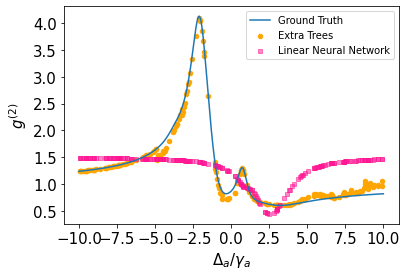

In [17]:
# plt.scatter(Y_test_r, Y_test_g2,label = 'Ground Truth')
plt.plot(Delta_extended, g2_case3_extended,label = 'Ground Truth')
plt.scatter(Y_test_r, Y_predict_RFR,color='orange',marker="o",s=20,label = 'Extra Trees')
plt.scatter(Y_test_r, Y_predict_NN,color='deeppink',marker="s",s=20,label = 'Linear Neural Network', alpha=0.5)
plt.legend()
plt.ylabel('$g^{(2)}$',fontsize=15)
plt.xlabel('$\Delta_{a}/\gamma_a$',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.xlabel(fontsize=15)
plt.savefig("tree_linear_nn.pdf", format="pdf", bbox_inches="tight")